In [1]:
from pandas import read_csv
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 15})
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define a very simple function to searhch for models - will have to be flexible, given that
# Python arch_model does not take as mean the ARMA model, but only ARX model...
# When possible, will choose simpler models.
def searchARMA(data, exog, max_p, max_q):

    aic = np.zeros((max_p,max_q))
    bic = np.zeros((max_p,max_q))
    for i in range(max_p):
        for j in range(max_q):
            try:
                if(len(exog) == len(data)):
                    model = ARMA(data,(i,j), exog = exog)
                else:
                     model = ARMA(data,(i,j))
                res = model.fit(trend='nc')
                aic[i,j] = res.aic
                bic[i,j] = res.bic
                print('p:',i,' q:', j,' aic:', aic[i,j], ' bic:', bic[i,j])
            except:
                continue

In [ ]:
def plot_diagnosticsTight3(data):

    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,6))

    ax1.hist(data, bins =40,color='m', density = True)
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    ax1.grid()
    ax1.set_title("Hist Resid")

    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Resid")

    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()




    fig = sm.qqplot(data, line='q', ax = ax4)
    ax4.grid()


    plt.tight_layout()


In [ ]:
series = read_csv('data/international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
X = series.values

<function matplotlib.pyplot.show(close=None, block=None)>

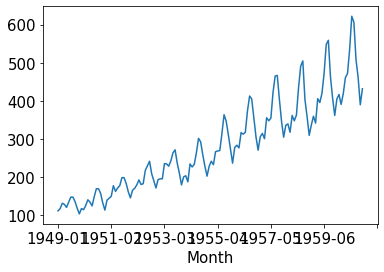

In [ ]:
series.plot()
pyplot.show

In [ ]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

Let’s log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [ ]:
Y = np.log(X)

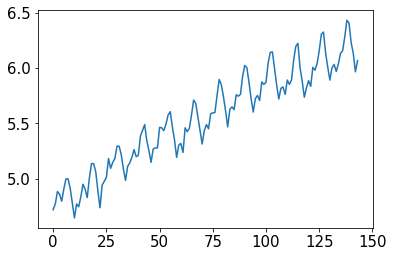

In [ ]:
pyplot.plot(Y)

In [ ]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579


Running the example shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

# MA Model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


In [ ]:
noise =  np.random.normal(0, 1, 1000)

In [ ]:
time_series = 10  +noise[1:] + 0.7*noise[:-1]

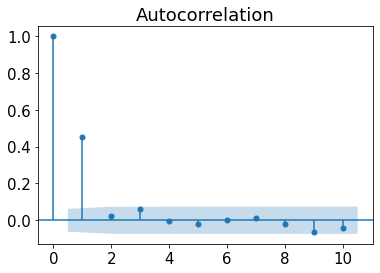

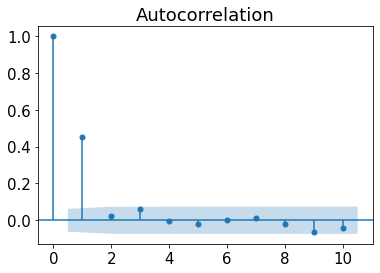

In [ ]:
plot_acf(time_series, lags=10)

In [ ]:
time_series2 = 10  + noise[2:] + 0.5*noise[1:-1]+ 0.3*noise[:-2]

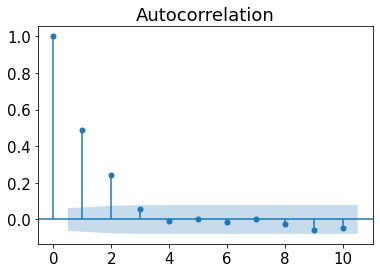

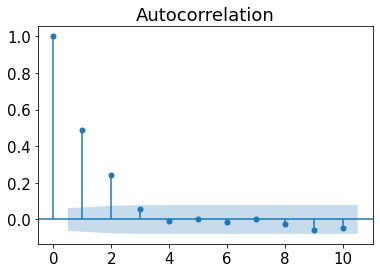

In [ ]:
plot_acf(time_series2, lags=10)

# ARMA(1,1) Model

In [ ]:
noise =  np.random.normal(0, 1, 1000)
y = np.zeros(1000)
beta=0.5
theta=0.3

In [ ]:
for i in range(999):
    y[i+1] = beta*y[i] + theta*noise[i] + noise[i+1]

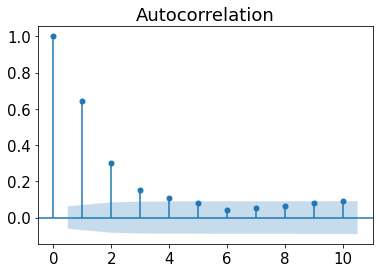

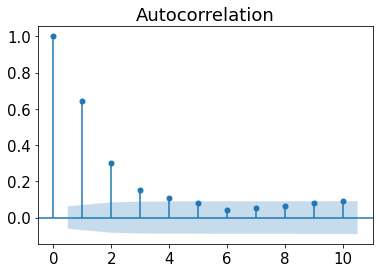

In [ ]:
plot_acf(y, lags=10)

# ARMA(1,5) Model

In [ ]:
noise =  np.random.normal(0, 1, 5000)
y = np.zeros(5000-4)
beta=0.8
theta1=0.9
theta2=0.9
theta3=0.9
theta4=0.9
theta5=0.9

In [ ]:
for i in range(5000-5):
    y[i+1] = beta*y[i]  + noise[i+4] +  theta1*noise[i+3] +  theta2*noise[i+2] +  theta3*noise[i+1] +  theta4*noise[i]

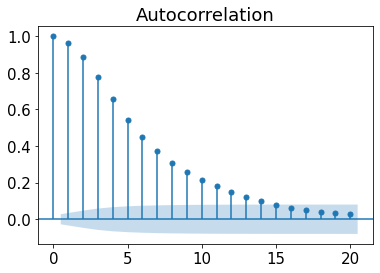

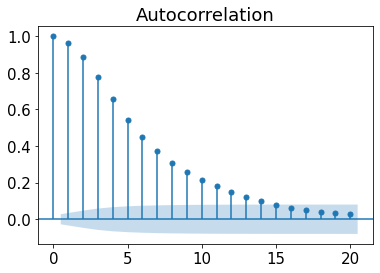

In [ ]:
plot_acf(y, lags=20)

# ARIMA Example: CPI Data

In [ ]:
cpi = read_csv('data/cpi.csv')

In [ ]:
cpi_value = np.array(cpi['Value'])
cpi_diff = cpi_value[1:]-cpi_value[:-1]

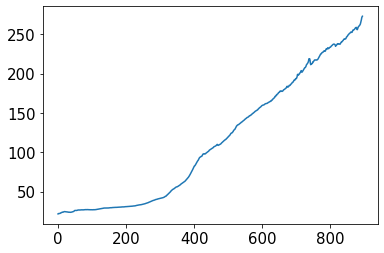

In [ ]:
plt.plot(cpi_value)


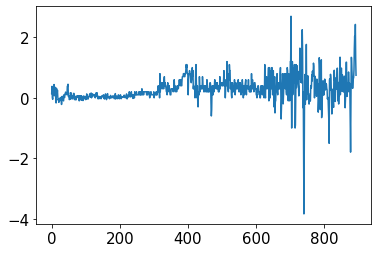

In [ ]:
plt.plot(cpi_diff)

In [ ]:
result = adfuller(cpi_value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.594333
p-value: 0.999074
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [ ]:
result = adfuller(cpi_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.945986
p-value: 0.040256
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [ ]:
n=len(cpi_diff)
exog = np.ones(n)
searchARMA(cpi_diff, exog, max_p=6, max_q =3)

p: 0  q: 0  aic: 971.0266906352794  bic: 980.6203380718291
p: 0  q: 1  aic: 672.5353458012762  bic: 686.9258169561008
p: 0  q: 2  aic: 629.831611689963  bic: 649.0189065630624
p: 1  q: 0  aic: 638.7976577728236  bic: 653.1881289276482
p: 1  q: 1  aic: 626.7442155194776  bic: 645.931510392577
p: 1  q: 2  aic: 604.1162251490878  bic: 628.100343740462
p: 2  q: 0  aic: 629.7888357048337  bic: 648.9761305779331
p: 2  q: 1  aic: 628.5474372525489  bic: 652.5315558439231
p: 2  q: 2  aic: 592.7313574465147  bic: 621.5122997561639
p: 3  q: 0  aic: 622.7795772561842  bic: 646.7636958475584
p: 3  q: 1  aic: 590.8806797496684  bic: 619.6616220593176
p: 3  q: 2  aic: 592.4454057484215  bic: 626.0231717763455
p: 4  q: 0  aic: 617.4941156116167  bic: 646.2750579212659
p: 4  q: 1  aic: 592.2539988757235  bic: 625.8317649036475
p: 4  q: 2  aic: 594.428014317499  bic: 632.8026040636978
p: 5  q: 0  aic: 619.4939021320617  bic: 653.0716681599857
p: 5  q: 1  aic: 593.5162981656731  bic: 631.8908879118719
p

In [ ]:
model = ARIMA(cpi_diff, order=(3,0,1))
ARMA_res = model.fit()
print(ARMA_res.summary());

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  895
Model:                     ARMA(3, 1)   Log Likelihood                -289.440
Method:                       css-mle   S.D. of innovations              0.334
Date:                Wed, 27 Sep 2023   AIC                            590.881
Time:                        23:31:48   BIC                            619.662
Sample:                             0   HQIC                           601.878
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3046      0.102      2.981      0.003       0.104       0.505
ar.L1.y        1.5401      0.037     41.529      0.000       1.467       1.613
ar.L2.y       -0.7238      0.056    -12.848      0.0

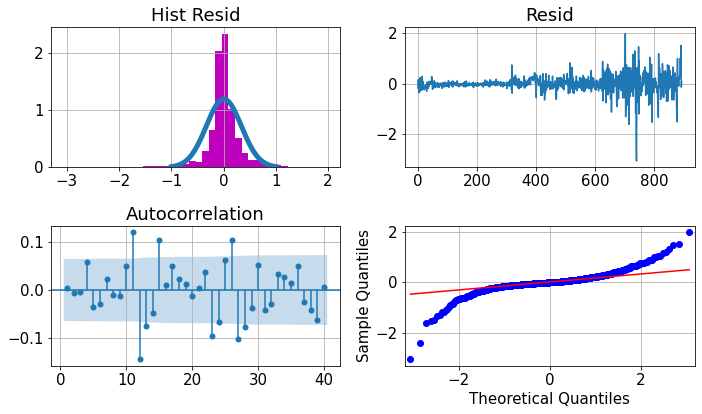

In [ ]:
resid = ARMA_res.resid
plot_diagnosticsTight3(resid)

# ARIMA Model: Apple Stock Return

In [3]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 12,15)

AAPL = yf.download('AAPL', start , end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
AAPL_pr = np.array(AAPL.reset_index()['Close'])

In [5]:
AAPL_pr_diff = AAPL_pr[1:] - AAPL_pr[:-1]
AAPL_pr_log = np.log(AAPL_pr)
AAPL_pr_log_diff = AAPL_pr_log[1:] - AAPL_pr_log[:-1]

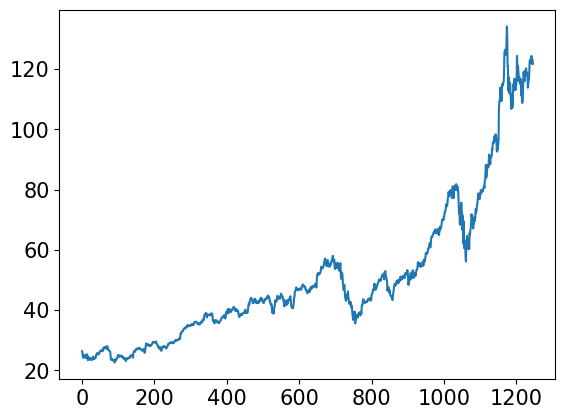

In [6]:
plt.plot(AAPL_pr)

In [7]:
result = adfuller(AAPL_pr)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.863431
p-value: 0.992594
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [8]:
result = adfuller(AAPL_pr_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.217332
p-value: 0.000000
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [9]:
result = adfuller(AAPL_pr_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.079047
p-value: 0.964601
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [10]:
result = adfuller(AAPL_pr_log_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.586649
p-value: 0.000000
	1%: -3.436
	5%: -2.864
	10%: -2.568


## Let's work with price difference first

In [11]:
n=len(AAPL_pr_diff)
exog = np.ones(n)
searchARMA(AAPL_pr_diff, exog, max_p=6, max_q =3)

In [ ]:
model = ARIMA(AAPL_pr_diff, order=(4,0,2))
ARMA_res = model.fit()
print(ARMA_res.summary());

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1246
Model:                     ARMA(4, 2)   Log Likelihood               -2038.594
Method:                       css-mle   S.D. of innovations              1.242
Date:                Wed, 27 Sep 2023   AIC                           4093.187
Time:                        23:31:59   BIC                           4134.209
Sample:                             0   HQIC                          4108.611
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0767      0.033      2.347      0.019       0.013       0.141
ar.L1.y       -1.9287      0.039    -49.466      0.000      -2.005      -1.852
ar.L2.y       -1.1033      0.074    -14.815      0.0

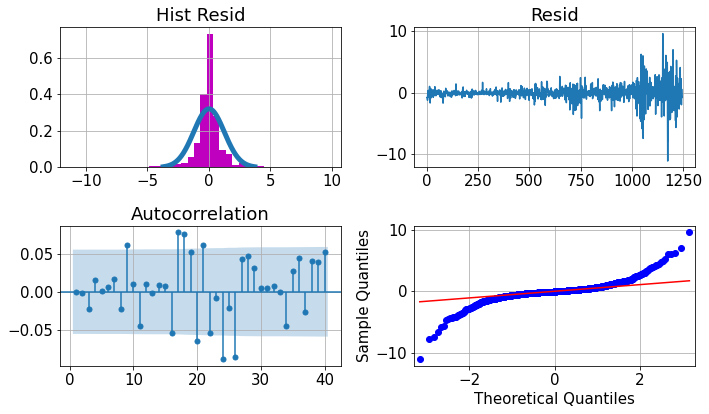

In [ ]:
resid = ARMA_res.resid
plot_diagnosticsTight3(resid)

## Let's then work with the log(price) difference

In [12]:
n=len(AAPL_pr_log_diff)
exog = np.ones(n)
searchARMA(AAPL_pr_log_diff, exog, max_p=6, max_q =3)

In [ ]:
model = ARIMA(AAPL_pr_log_diff, order=(4,0,2))
ARMA_res = model.fit()
print(ARMA_res.summary());

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1246
Model:                     ARMA(4, 2)   Log Likelihood                3203.966
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 27 Sep 2023   AIC                          -6391.933
Time:                        23:32:11   BIC                          -6350.911
Sample:                             0   HQIC                         -6376.509
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      2.618      0.009       0.000       0.002
ar.L1.y       -1.6900      0.061    -27.780      0.000      -1.809      -1.571
ar.L2.y       -0.8993      0.074    -12.077      0.0

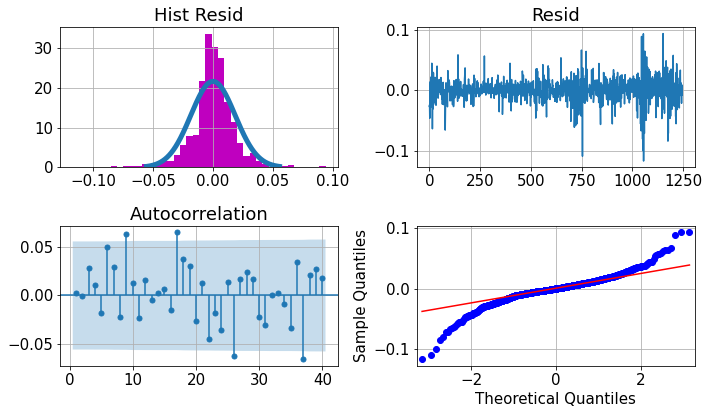

In [ ]:
resid = ARMA_res.resid
plot_diagnosticsTight3(resid)